In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

[['no' 'M' 2 ... 6 18 118]
 ['yes' 'M' 2 ... 7 19 107]
 ['yes' 'M' 3 ... 5 18 108]
 ...
 ['yes' 'M' 2 ... 5 17 123]
 ['yes' 'F' 1 ... 8 17 104]
 ['yes' 'M' 1 ... 6 18 128]]
[[0 0 2 ... 6 18 118]
 [1 0 2 ... 7 19 107]
 [1 0 3 ... 5 18 108]
 ...
 [1 0 2 ... 5 17 123]
 [1 1 1 ... 8 17 104]
 [1 0 1 ... 6 18 128]]


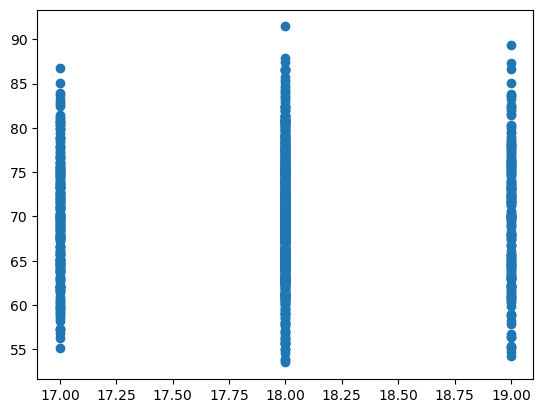

In [2]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

print(x_train)
# Try plotting y_train with different features
plt.scatter(x_train[:,6],y_train)
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM


def feature_changing(x_train):
    for i in x_train:
        if i[0]=='no':
            i[0] = int(0)
        else:
            i[0] = int(1)
        if i[1]=='M':
            i[1] = int(0)
        else:
            i[1] = int(1)
    return x_train

x_train = feature_changing(x_train)
print(x_train)
#x_train = x_train.astype(int)

In [3]:
def z_score(x_train):
    x_mean = np.mean(x_train,axis = 0)
    x_std = np.std(x_train,axis = 0)
    x_train = (x_train - x_mean)/x_std
    return x_train,x_std,x_mean
#x_train = z_score(x_train)

In [4]:
def cost(x_train,y_train,w,b):
    y_cap = np.dot(x_train,w) + b
    loss = (1/(2*x_train.shape[0]))*np.sum((y_cap - y_train)**2)
    return loss

In [5]:
def gradient_descent(x_train,y_train,w,b):
    alpha = 0.003
    y_cap = np.dot(x_train,w) + b
    dJ = (1/x_train.shape[0])*alpha
    w,b = w - dJ*(np.dot(x_train.T,(y_cap - y_train))), b - dJ*np.sum(y_cap - y_train)
    return w,b

In [6]:

x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
    old_cost = cost(x_train,y_train,w,b)
    w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
        accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
